# Set Up of a Custom Environment

OpenAI Gym comes with a lot of differents environments. However, for more specific tasks it may be necessary to build a ** custom environment **.

Gym environments are located inside the directory  

```virtualenv_path/lib/python3.6/site-packages/gym/envs```.  

Inside this directory there are other folders which contains the default gym environments.  
To set a custom environment start by creating a new folder in gym/envs.  

Let's suppose to call this folder **custom_env_folder**

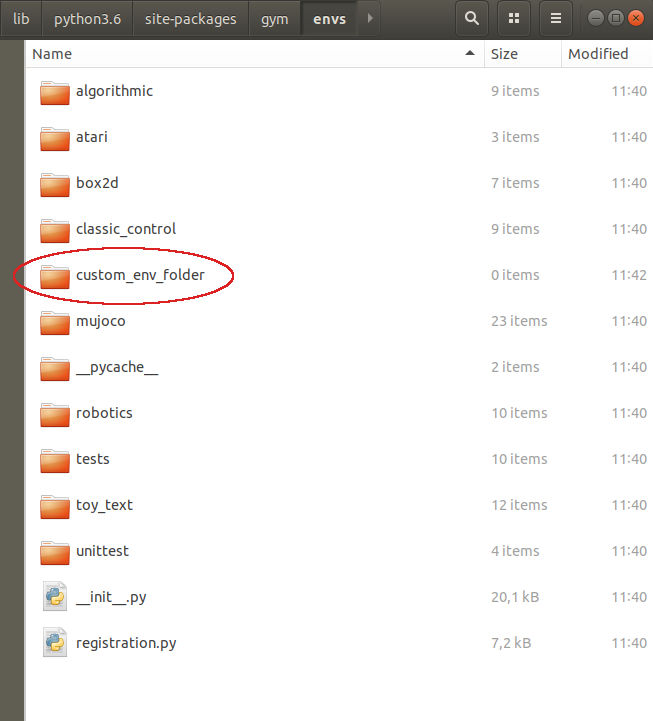

Inside this folder we will be  placing the custom gym environment. The following cell show the main structure of an environment and its main methods.  

## Structure of the environment 

The environment is defined as a class and must contains the following methods:  

**\__init\__**:   
The \__init\__ is used to initialize the variable of the environment;  
Moreover inside the init we will define the action space and the observation space which define the range of action the environment is capable of and the set of observations it should output.  

**seed(seed)**:   
Used to set a random seed inside the environment.

**step(action)**:   
Perform an action inside the environment. This method returns four values as output.  
* **observation**: the next state of the environment.
* **reward**: amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.  
* **done**: whether it’s time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated.  
* **info**:  diagnostic information useful for debugging.  

**render( )**:   
Used in order to allow visualization of the environment  

**reset( )**:  
It allows to reset the environment to the initial state. It return the actual observation and switch the Done to False.

### Building the environment  

In [9]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np

class Test_environment(gym.Env):
        
    def __init__(self):
        #Discrete action space, valid action are 0 and 1
        self.action_space = spaces.Discrete(2)
        #observation space will be a value ranging from 0 to 1 with shape (1,)
        self.observation_space = spaces.Box(0, 1, shape=(1,), dtype = np.float32) 

        
    def seed(self, seed = None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
        
    
    def step(self, action):
        self.reward = 1 
        return np.array(self.state), self.reward, self.done, {}
    
    
    def render(self):
        pass
    
    
    def reset(self): 
        self.done = False
        return np.array(self.obs)

After building the environment, save it as a *.py file, for example:  

``` custom_environment.py ```

Inside the same folder we should create the **\__init\__.py**.  

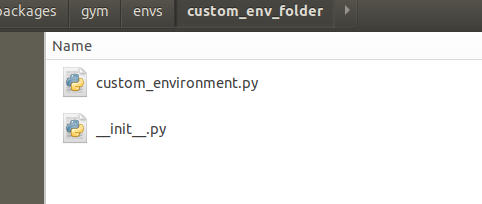

This file will simply contain the import of the class we have built:  

``` __init__.py  ```

``` python
from gym.envs.custom_env_folder.custom_environment import Test_environment```

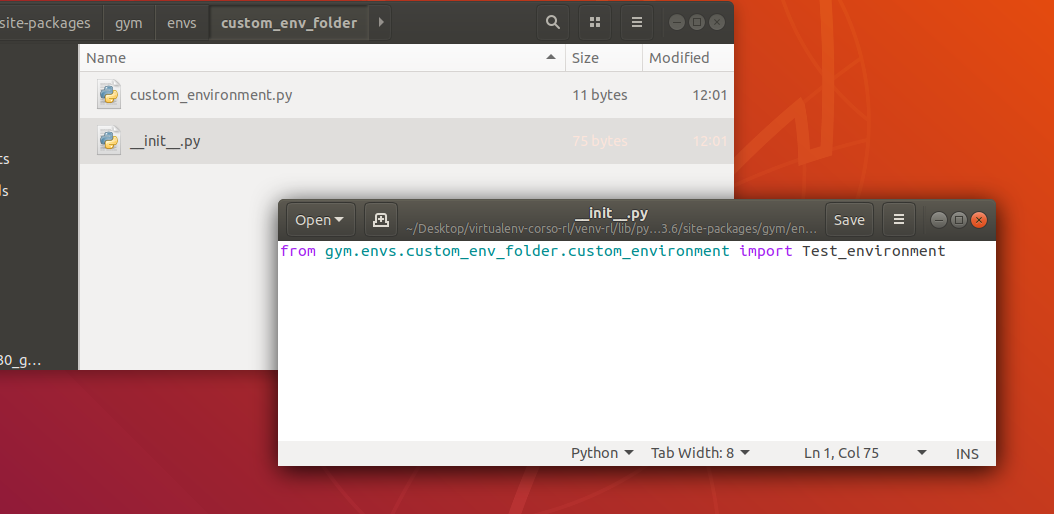

### Register the environment

The last step is the **registration of the environment**. This step will assign an ID to the environment so it is possible to create it through the gym.make('env-id') function.

In order to register a new environment open the file gym/envs/\__init\__.py and add:

```python
register(
    id='custom_environment_id-v0',
    entry_point='gym.envs.custom_env_folder:Test_environment',
)```

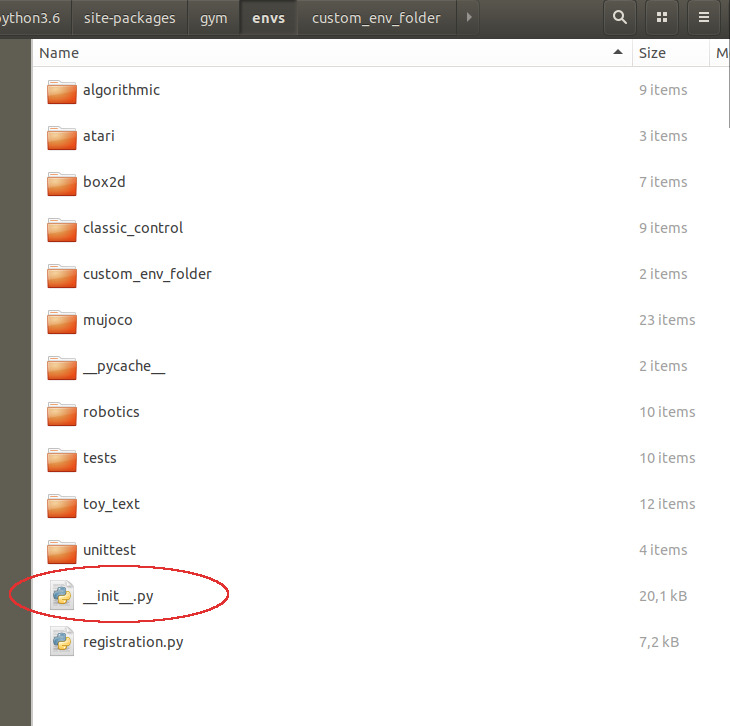

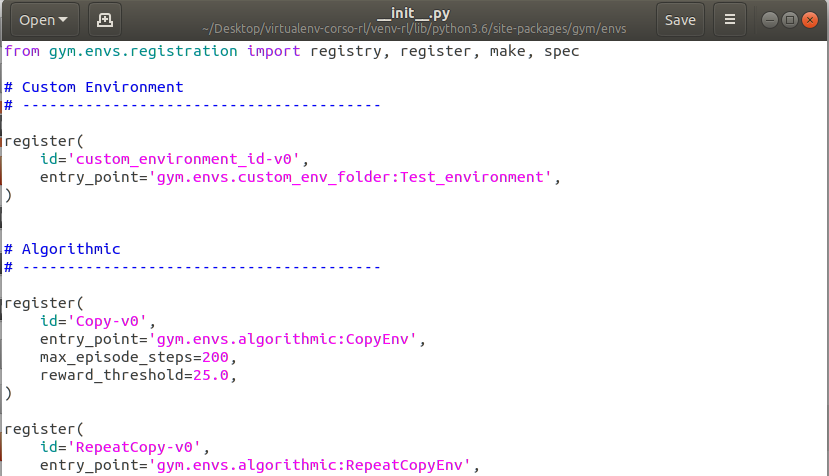

### Make the environment  

After the registration is completed we can finally call the **gym.make('env-id')** function in order to create our environment

In [8]:
import gym
env = gym.make('custom_environment_id-v0')